<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [7]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [11]:
# Install required packages in Pyodide environment
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn', 'scikit-learn', 'matplotlib'])

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'

# For Pyodide environment:
from pyodide.http import pyfetch

async def download(url):
    response = await pyfetch(url)
    return await response.string()

data = await download(URL)
df = pd.read_csv(io.StringIO(data))

# For regular Python environment (alternative):
# df = pd.read_csv(URL)

# Task 1: Create NumPy array from Class column
Y = df['Class'].to_numpy()  # Target variable (1=successful landing, 0=unsuccessful)

# Verify
print("First 5 target values:", Y[:5])
print("Class distribution:\n", pd.Series(Y).value_counts())

# Prepare features (X) - you'll need to select/engineer these
# Example using some columns:
features = ['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs']
X = pd.get_dummies(df[features])  # Convert categorical variables to dummy variables

# Show prepared data
print("\nFeatures shape:", X.shape)
print("Target shape:", Y.shape)

First 5 target values: [0 0 0 0 0]
Class distribution:
 1    60
0    30
Name: count, dtype: int64

Features shape: (90, 20)
Target shape: (90,)


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [13]:
# students get this 
# Standardize the features
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reassign to X (as requested)
X = X_scaled

# Split data into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split training data into training (80%) and validation (20%) sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape) # Define the parameter grids for each classifier
parameters_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

parameters_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

parameters_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

parameters_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create model instances with GridSearchCV
models = {
    'LogisticRegression': GridSearchCV(LogisticRegression(), parameters_lr, cv=5),
    'SVM': GridSearchCV(SVC(probability=True), parameters_svm, cv=5),
    'DecisionTree': GridSearchCV(DecisionTreeClassifier(), parameters_dt, cv=5),
    'KNN': GridSearchCV(KNeighborsClassifier(), parameters_knn, cv=5)
}
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, Y_train)
    
    # Store results
    results[name] = {
        'best_params': model.best_params_,
        'train_score': model.score(X_train, Y_train),
        'val_score': model.score(X_val, Y_val),
        'test_score': model.score(X_test, Y_test)
    }
    
    print(f"Best parameters: {model.best_params_}")
    print(f"Validation accuracy: {results[name]['val_score']:.3f}")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nModel Performance Summary:")
print(results_df[['val_score', 'test_score']].sort_values('val_score', ascending=False))

Training set shape: (54, 20)
Validation set shape: (18, 20)
Test set shape: (18, 20)

Training LogisticRegression...
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation accuracy: 0.667

Training SVM...
Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Validation accuracy: 0.722

Training DecisionTree...
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Validation accuracy: 0.667

Training KNN...
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Validation accuracy: 0.667

Model Performance Summary:
                    val_score  test_score
SVM                  0.722222    0.944444
LogisticRegression   0.666667    0.944444
DecisionTree         0.666667    0.888889
KNN                  0.666667    0.888889


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [14]:
# Split the standardized data into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                   test_size=0.2, 
                                                   random_state=2)

# Verify the shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", Y_train.shape)
print("Test target shape:", Y_test.shape)

# Show class distribution in each set
print("\nClass distribution in training set:")
print(pd.Series(Y_train).value_counts(normalize=True))

print("\nClass distribution in test set:")
print(pd.Series(Y_test).value_counts(normalize=True))

Training features shape: (72, 20)
Test features shape: (18, 20)
Training target shape: (72,)
Test target shape: (18,)

Class distribution in training set:
1    0.666667
0    0.333333
Name: proportion, dtype: float64

Class distribution in test set:
1    0.666667
0    0.333333
Name: proportion, dtype: float64


we can see we only have 18 test samples.


In [15]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
# Define the parameter grid for logistic regression
parameters = {
    'C': [0.01, 0.1, 1, 10],              # Inverse of regularization strength
    'penalty': ['l2'],                     # Regularization type
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Optimization algorithms
}

# Create a logistic regression object
logreg = LogisticRegression(random_state=2)

# Create GridSearchCV object
logreg_cv = GridSearchCV(estimator=logreg, 
                        param_grid=parameters,
                        cv=10,            # 10-fold cross-validation
                        scoring='accuracy',
                        verbose=1)         # Shows progress

# Fit the model to find best parameters
logreg_cv.fit(X_train, Y_train)

# Display the best parameters and score
print("Best parameters:", logreg_cv.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(logreg_cv.best_score_))

# Evaluate on test set
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy: {:.3f}".format(test_accuracy))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy: 0.848
Test set accuracy: 0.833


In [18]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [19]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.8482142857142856


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
# Calculate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)

# Print formatted results
print("="*50)
print("Logistic Regression Evaluation")
print("="*50)
print(f"Best Parameters: {logreg_cv.best_params_}")
print(f"Cross-Validation Accuracy: {logreg_cv.best_score_:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("="*50)

# Additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = logreg_cv.predict(X_test)

# Generate classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Logistic Regression Evaluation
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Cross-Validation Accuracy: 0.8482
Test Set Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Confusion Matrix:
[[ 3  3]
 [ 0 12]]


Lets look at the confusion matrix:


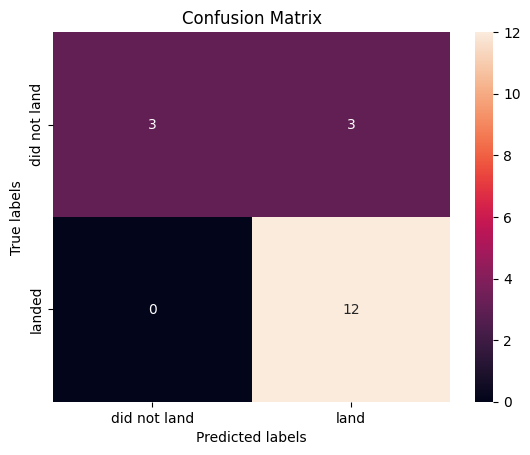

In [21]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
# Define the parameter grid for SVM
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'C': [0.1, 1, 10, 100],                         # Regularization parameter
    'gamma': ['scale', 'auto'] + [0.01, 0.1, 1]      # Kernel coefficient
}

# Create an SVM object
svm = SVC(random_state=2, probability=True)

# Create GridSearchCV object
svm_cv = GridSearchCV(estimator=svm, 
                     param_grid=parameters,
                     cv=10,               # 10-fold cross-validation
                     scoring='accuracy',
                     n_jobs=-1,           # Use all available CPUs
                     verbose=1)

# Fit the model to find best parameters
svm_cv.fit(X_train, Y_train)

# Display the best parameters and score
print("="*60)
print("SVM Hyperparameter Tuning Results")
print("="*60)
print(f"Best parameters: {svm_cv.best_params_}")
print(f"Best cross-validation accuracy: {svm_cv.best_score_:.4f}")

# Evaluate on test set
test_accuracy = svm_cv.score(X_test, Y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")
print("="*60)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
SVM Hyperparameter Tuning Results
Best parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best cross-validation accuracy: 0.8750
Test set accuracy: 0.8333


In [23]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
accuracy : 0.875


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


Support Vector Machine - Final Evaluation
Best Parameters Found: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Cross-Validation Accuracy: 0.8750
Test Set Accuracy: 0.8333

Detailed Classification Report:
              precision    recall  f1-score   support

     Failure       1.00      0.50      0.67         6
     Success       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Confusion Matrix:
[[ 3  3]
 [ 0 12]]


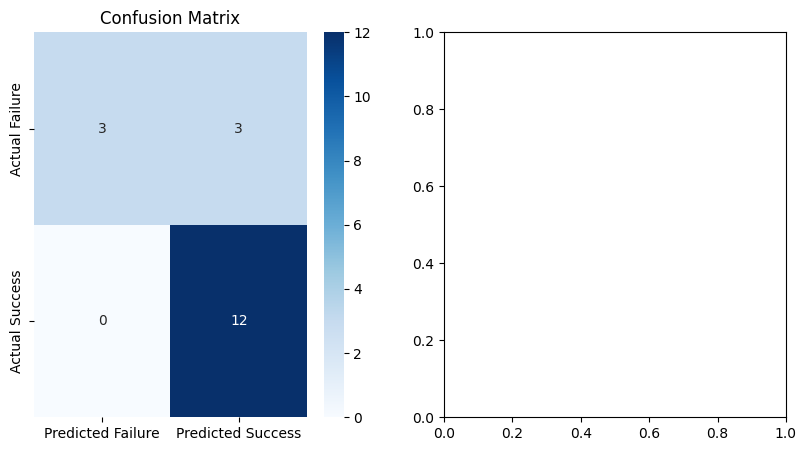

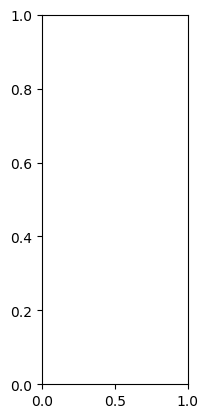

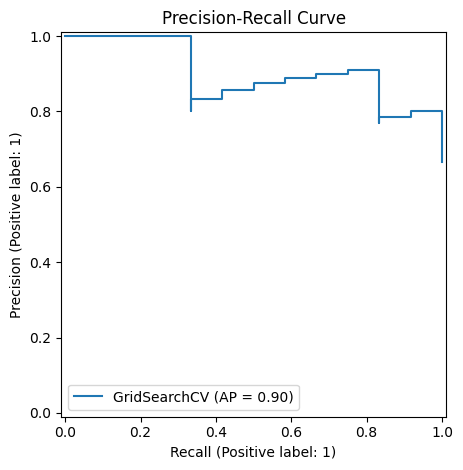

In [24]:
# Calculate test accuracy using the best estimator from GridSearchCV
test_accuracy = svm_cv.score(X_test, Y_test)

# Print comprehensive evaluation report
print("="*60)
print("Support Vector Machine - Final Evaluation")
print("="*60)
print(f"Best Parameters Found: {svm_cv.best_params_}")
print(f"Cross-Validation Accuracy: {svm_cv.best_score_:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("="*60)

# Generate detailed classification metrics
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = svm_cv.predict(X_test)
y_proba = svm_cv.predict_proba(X_test)[:, 1]  # Probability estimates for ROC

# Classification report
print("\nDetailed Classification Report:")
print(classification_report(Y_test, y_pred, target_names=['Failure', 'Success']))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Set up figure
plt.figure(figsize=(15, 5))

# Confusion Matrix Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(Y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Failure', 'Predicted Success'],
            yticklabels=['Actual Failure', 'Actual Success'])
plt.title('Confusion Matrix')

# ROC Curve
plt.subplot(1, 3, 2)
RocCurveDisplay.from_estimator(svm_cv, X_test, Y_test)
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.title('ROC Curve')

# Precision-Recall Curve
plt.subplot(1, 3, 3)
PrecisionRecallDisplay.from_estimator(svm_cv, X_test, Y_test)
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

We can plot the confusion matrix


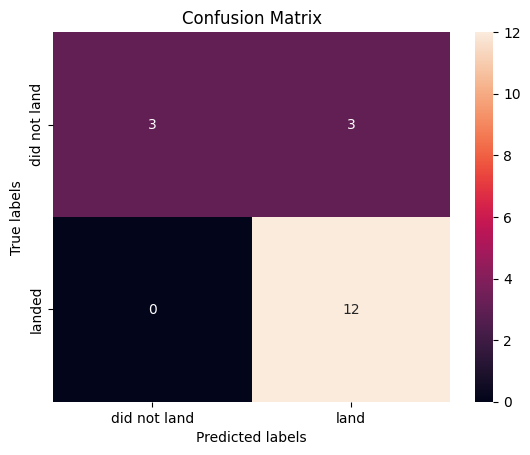

In [25]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_p

Decision Tree Hyperparameter Tuning Results
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best cross-validation accuracy: 0.8750
Test set accuracy: 0.5556

Top 5 parameter combinations:
                                                params  mean_test_score  \
263  {'criterion': 'gini', 'max_depth': 8, 'max_fea...            0.875   
47   {'criterion': 'gini', 'max_depth': None, 'max_...            0.875   
245  {'criterion': 'gini', 'max_depth': 8, 'max_fea...            0.875   
29   {'criterion': 'gini', 'max_depth': None, 'max_...            0.875   
299  {'criterion': 'gini', 'max_depth': 10, 'max_fe...            0.875   

     std_test_score  
263        0.094828  
47         0.094828  
245        0.094828  
29         0.094828  
299        0.094828  


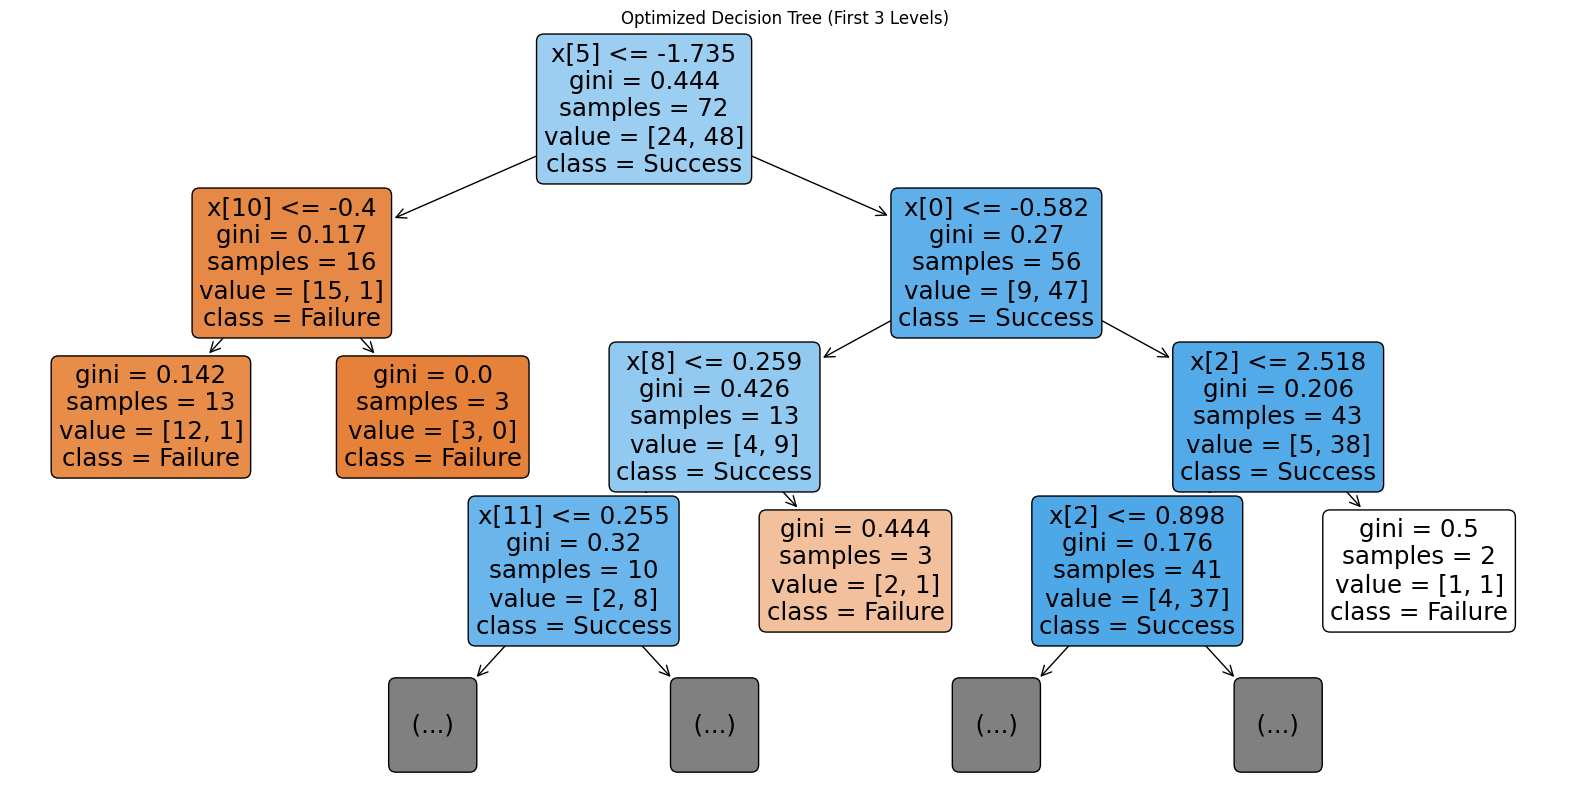

In [32]:
# Define the parameter grid for Decision Tree
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Decision Tree object
tree = DecisionTreeClassifier(random_state=2)

# Create GridSearchCV object
tree_cv = GridSearchCV(estimator=tree,
                      param_grid=parameters,
                      cv=10,               # 10-fold cross-validation
                      scoring='accuracy',
                      n_jobs=-1,           # Use all available CPUs
                      verbose=1)

# Fit the model to find best parameters
tree_cv.fit(X_train, Y_train)

# Display the best parameters and score
print("="*60)
print("Decision Tree Hyperparameter Tuning Results")
print("="*60)
print(f"Best parameters: {tree_cv.best_params_}")
print(f"Best cross-validation accuracy: {tree_cv.best_score_:.4f}")

# Evaluate on test set
test_accuracy = tree_cv.score(X_test, Y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")
print("="*60)
# View complete cross-validation results
cv_results = pd.DataFrame(tree_cv.cv_results_)
print("\nTop 5 parameter combinations:")
print(cv_results.sort_values('rank_test_score').head(5)[['params', 'mean_test_score', 'std_test_score']])

# Visualize the best tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_cv.best_estimator_,
          feature_names=X.columns if hasattr(X, 'columns') else None,
          class_names=['Failure', 'Success'],
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for visualization
plt.title("Optimized Decision Tree (First 3 Levels)")
plt.show()


In [28]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Optimized Decision Tree - Final Test Evaluation
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Cross-Validation Accuracy: 0.8750
Test Set Accuracy: 0.5556

Classification Report:
              precision    recall  f1-score   support

     Failure       0.38      0.50      0.43         6
     Success       0.70      0.58      0.64        12

    accuracy                           0.56        18
   macro avg       0.54      0.54      0.53        18
weighted avg       0.59      0.56      0.57        18


Confusion Matrix (Counts):
[[3 3]
 [5 7]]

Confusion Matrix (Percentages):
[[0.5   0.5  ]
 [0.417 0.583]]


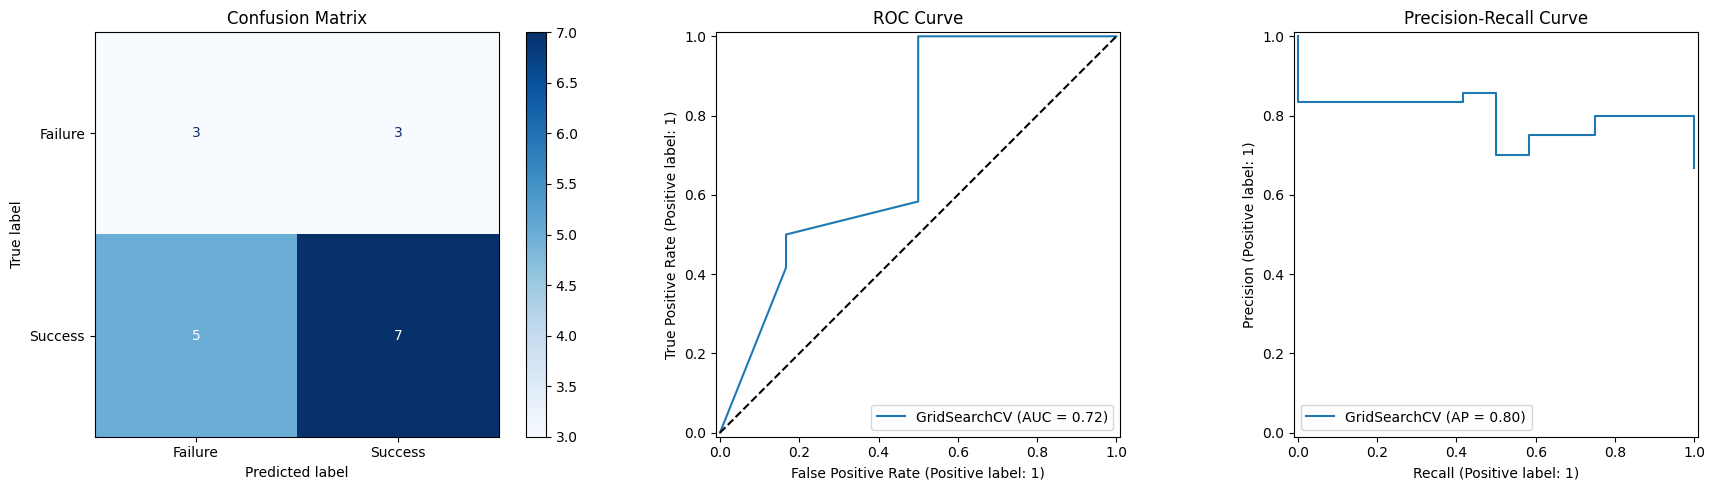

In [29]:
# Calculate test accuracy using the best estimator
test_accuracy = tree_cv.score(X_test, Y_test)

# Generate comprehensive evaluation report
print("="*70)
print("Optimized Decision Tree - Final Test Evaluation")
print("="*70)
print(f"Best Parameters: {tree_cv.best_params_}")
print(f"Cross-Validation Accuracy: {tree_cv.best_score_:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("="*70)

# Generate detailed performance metrics
from sklearn.metrics import (classification_report, 
                           confusion_matrix,
                           precision_recall_fscore_support)

# Get predictions and probabilities
y_pred = tree_cv.predict(X_test)
y_proba = tree_cv.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Success)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['Failure', 'Success']))

# Confusion matrix with percentages
conf_mat = confusion_matrix(Y_test, y_pred)
conf_mat_percent = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]

print("\nConfusion Matrix (Counts):")
print(conf_mat)

print("\nConfusion Matrix (Percentages):")
print(np.round(conf_mat_percent, 3))
import matplotlib.pyplot as plt
from sklearn.metrics import (ConfusionMatrixDisplay, 
                           RocCurveDisplay,
                           PrecisionRecallDisplay)

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree_cv, X_test, Y_test,
                                    display_labels=['Failure', 'Success'],
                                    cmap='Blues',
                                    ax=ax1)
ax1.set_title('Confusion Matrix')

# 2. ROC Curve
RocCurveDisplay.from_estimator(tree_cv, X_test, Y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], 'k--')  # Diagonal line
ax2.set_title('ROC Curve')

# 3. Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(tree_cv, X_test, Y_test, ax=ax3)
ax3.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

We can plot the confusion matrix


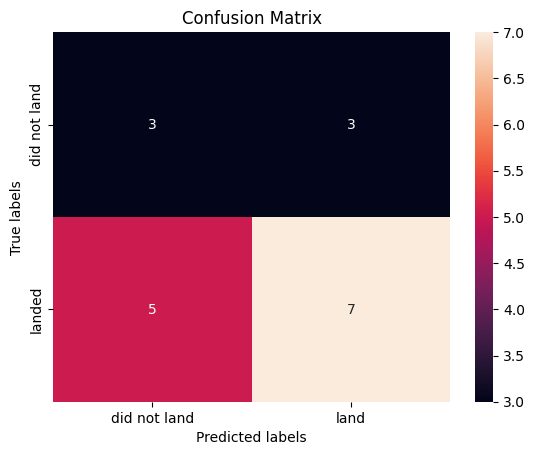

In [30]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Fitting 10 folds for each of 36 candidates, totalling 360 fits
k-Nearest Neighbors Hyperparameter Tuning Results
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation accuracy: 0.8625
Test set accuracy: 0.8333


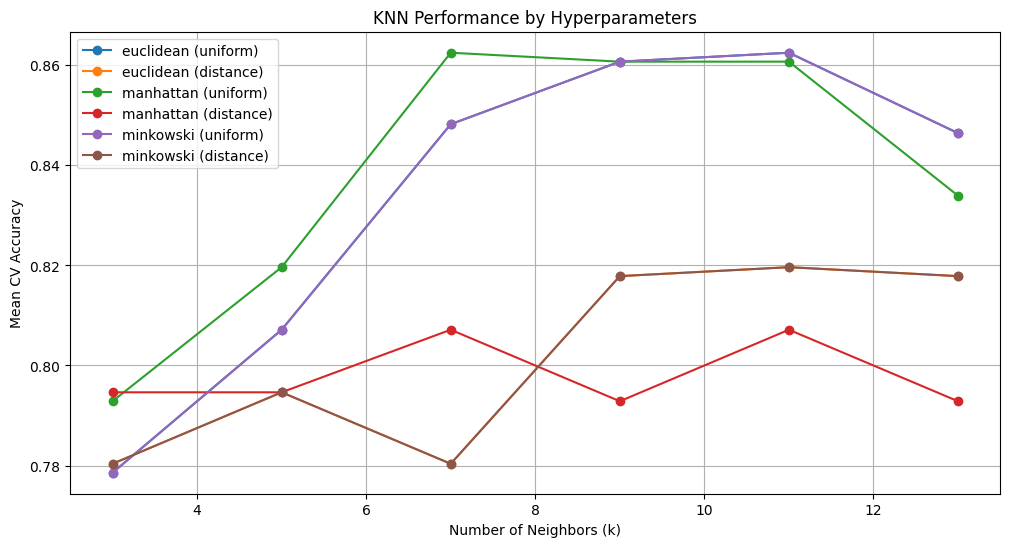


Top 5 parameter combinations:
                                               params  mean_test_score  \
32  {'metric': 'minkowski', 'n_neighbors': 11, 'we...         0.862500   
16  {'metric': 'manhattan', 'n_neighbors': 7, 'wei...         0.862500   
8   {'metric': 'euclidean', 'n_neighbors': 11, 'we...         0.862500   
20  {'metric': 'manhattan', 'n_neighbors': 11, 'we...         0.860714   
18  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...         0.860714   

    std_test_score  
32        0.116291  
16        0.116291  
8         0.116291  
20        0.106486  
18        0.106486  


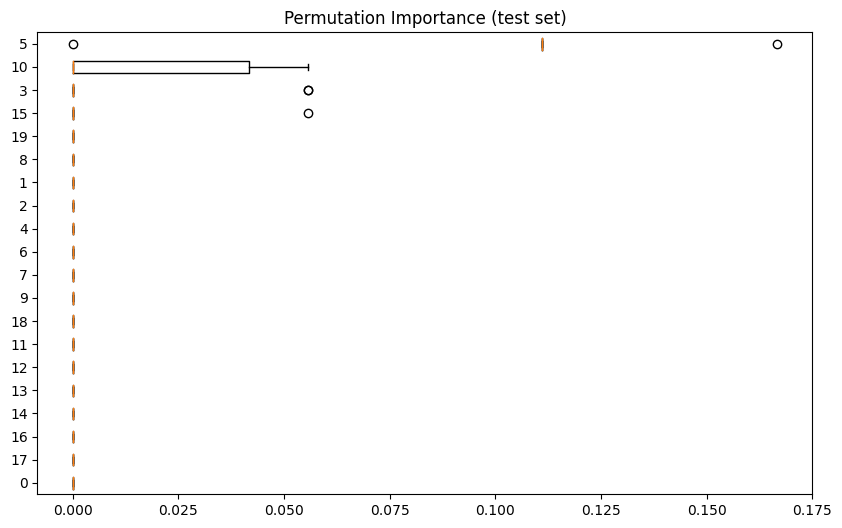

In [33]:
# Define the parameter grid for KNN
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],      # Number of neighbors
    'weights': ['uniform', 'distance'],         # Weighting method
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Create a KNN object
knn = KNeighborsClassifier()

# Create GridSearchCV object
knn_cv = GridSearchCV(estimator=knn,
                     param_grid=parameters,
                     cv=10,                    # 10-fold cross-validation
                     scoring='accuracy',
                     n_jobs=-1,                # Use all available CPUs
                     verbose=1)

# Fit the model to find best parameters
knn_cv.fit(X_train, Y_train)

# Display the best parameters and score
print("="*60)
print("k-Nearest Neighbors Hyperparameter Tuning Results")
print("="*60)
print(f"Best parameters: {knn_cv.best_params_}")
print(f"Best cross-validation accuracy: {knn_cv.best_score_:.4f}")

# Evaluate on test set
test_accuracy = knn_cv.score(X_test, Y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")
print("="*60)
import matplotlib.pyplot as plt

# Extract CV results
cv_results = pd.DataFrame(knn_cv.cv_results_)

# Plot accuracy vs k values
plt.figure(figsize=(12, 6))
for metric in ['euclidean', 'manhattan', 'minkowski']:
    for weight in ['uniform', 'distance']:
        subset = cv_results[(cv_results['param_metric'] == metric) & 
                          (cv_results['param_weights'] == weight)]
        plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], 
                'o-', label=f"{metric} ({weight})")

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN Performance by Hyperparameters')
plt.legend()
plt.grid()
plt.show()
# View complete cross-validation results
print("\nTop 5 parameter combinations:")
print(cv_results.sort_values('rank_test_score').head(5)[['params', 'mean_test_score', 'std_test_score']])

# Feature importance (based on permutation importance)
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_cv, X_test, Y_test, n_repeats=10, random_state=2)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T,
           vert=False,
           labels=np.array(X.columns)[sorted_idx] if hasattr(X, 'columns') else sorted_idx)
plt.title("Permutation Importance (test set)")
plt.show()

In [34]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
accuracy : 0.8625


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


Optimized k-Nearest Neighbors - Final Evaluation
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Cross-Validation Accuracy: 0.8625
Test Set Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

     Failure       1.00      0.50      0.67         6
     Success       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18


Confusion Matrix (Counts):
[[ 3  3]
 [ 0 12]]

Confusion Matrix (Percentages):
[[0.5 0.5]
 [0.  1. ]]


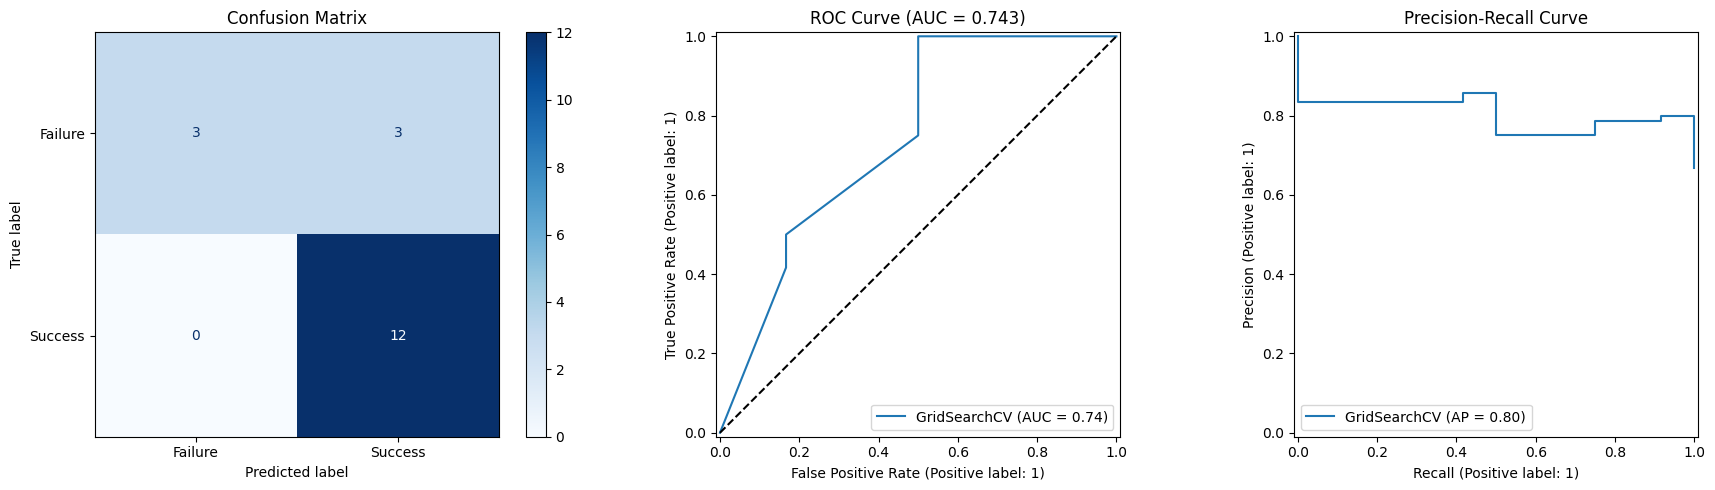

,Value
Test Accuracy,0.833333
Precision (Success),0.800000
Recall (Success),1.000000
F1-Score (Success),0.888889
ROC AUC,0.743056
True Positives,12.000000
False Positives,3.000000
True Negatives,3.000000
False Negatives,0.000000


In [37]:
# Calculate test accuracy using the best estimator
test_accuracy = knn_cv.score(X_test, Y_test)

# Generate comprehensive evaluation report
print("="*70)
print("Optimized k-Nearest Neighbors - Final Evaluation")
print("="*70)
print(f"Best Parameters: {knn_cv.best_params_}")
print(f"Cross-Validation Accuracy: {knn_cv.best_score_:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("="*70)

# Generate detailed performance metrics
from sklearn.metrics import (classification_report, 
                           confusion_matrix,
                           roc_auc_score)

# Get predictions and probabilities
y_pred = knn_cv.predict(X_test)
y_proba = knn_cv.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Success)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=['Failure', 'Success']))

# Confusion matrix with absolute counts and percentages
conf_mat = confusion_matrix(Y_test, y_pred)
conf_mat_percent = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]

print("\nConfusion Matrix (Counts):")
print(conf_mat)

print("\nConfusion Matrix (Percentages):")
print(np.round(conf_mat_percent, 3))
import matplotlib.pyplot as plt
from sklearn.metrics import (ConfusionMatrixDisplay, 
                           RocCurveDisplay,
                           PrecisionRecallDisplay)

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
ConfusionMatrixDisplay.from_estimator(knn_cv, X_test, Y_test,
                                    display_labels=['Failure', 'Success'],
                                    cmap='Blues',
                                    ax=ax1)
ax1.set_title('Confusion Matrix')

# 2. ROC Curve
RocCurveDisplay.from_estimator(knn_cv, X_test, Y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], 'k--')  # Random classifier line
ax2.set_title(f'ROC Curve (AUC = {roc_auc_score(Y_test, y_proba):.3f})')

# 3. Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(knn_cv, X_test, Y_test, ax=ax3)
ax3.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Test Accuracy': test_accuracy,
    'Precision (Success)': precision_score(Y_test, y_pred),
    'Recall (Success)': recall_score(Y_test, y_pred),
    'F1-Score (Success)': f1_score(Y_test, y_pred),
    'ROC AUC': roc_auc_score(Y_test, y_proba),
    'True Positives': conf_mat[1, 1],
    'False Positives': conf_mat[0, 1],
    'True Negatives': conf_mat[0, 0],
    'False Negatives': conf_mat[1, 0]
}

pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

We can plot the confusion matrix


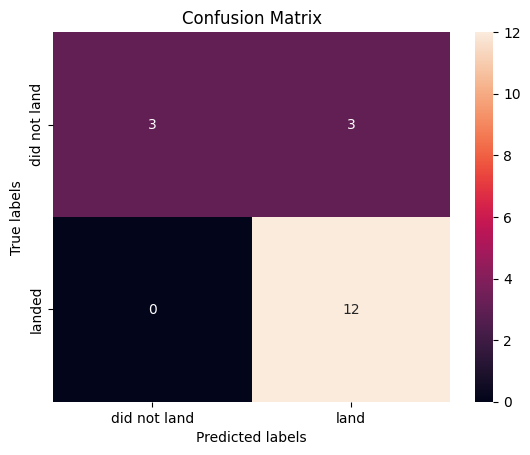

In [38]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
